# Machine Learning: Statistical Analysis and Model Generation

In [12]:
import pandas as pd
import numpy as np
import os
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

# set current working directory to root level
os.chdir('c:/Users/01eco/Documents/Programming/Python/multisource_ML_research')
random_state = 42
sns.set_theme(style="darkgrid")

### Statistical Analysis of Processed Dataset
The following analysis of a single bin is assumed to share similar statistical properties to the rest of the dataset

In [13]:
# Use bin 0 from window size 1 set for statistical analysis and feature selection
analysis_df = pd.read_csv('data/processed_data/merged_data_1/bin_0.csv')

In [14]:
analysis_df.shape

(32796, 79)

In [15]:
analysis_df.dtypes

Timestamp_t0                      float64
CoG Acceleration/X_t0             float64
CoG Acceleration/Y_t0             float64
CoG position/X_t0                 float64
CoG position/Y_t0                 float64
CoG position/Roll_t0              float64
CoG position/Pitch_t0             float64
CoG position/Yaw_t0               float64
Horizontal tangential speed_t0    float64
Over-steering criteria_t0         float64
Pitch %ground_t0                  float64
Pitch acceleration_t0             float64
Pitch speed_t0                    float64
Roll %ground_t0                   float64
Roll acceleration_t0              float64
Roll speed_t0                     float64
Slope force_t0                    float64
Speed/X_t0                        float64
Speed/Y_t0                        float64
Tangent Acceleration/X_t0         float64
Tangent Acceleration/Y_t0         float64
Tangential speed_t0               float64
Yaw %ground_t0                    float64
Yaw acceleration_t0               

In [16]:
# ! Eye tracking for the following is either missing completely or only contains timestamps and nothing else
# ! This issue is resolved later since the processing is built off the participant summary list and removing participant data will cause issues
# * Participant 2 - lthalf
# * Participant 9 - ltsignal, ltminor, lthalf
# * Participant 19 - all
# * Participant 26 - lthalf, ltsignal, ltmajor
# * Participant 49 - ltmajor
# * Participant 51 - lthalf 
analysis_df.isna().sum()

Timestamp_t0                      0
CoG Acceleration/X_t0             0
CoG Acceleration/Y_t0             0
CoG position/X_t0                 0
CoG position/Y_t0                 0
CoG position/Roll_t0              0
CoG position/Pitch_t0             0
CoG position/Yaw_t0               0
Horizontal tangential speed_t0    0
Over-steering criteria_t0         0
Pitch %ground_t0                  0
Pitch acceleration_t0             0
Pitch speed_t0                    0
Roll %ground_t0                   0
Roll acceleration_t0              0
Roll speed_t0                     0
Slope force_t0                    0
Speed/X_t0                        0
Speed/Y_t0                        0
Tangent Acceleration/X_t0         0
Tangent Acceleration/Y_t0         0
Tangential speed_t0               0
Yaw %ground_t0                    0
Yaw acceleration_t0               0
Yaw speed_t0                      0
Brake pedal force_t0              0
Gas pedal_t0                      0
Steering wheel angle_t0     

In [17]:
analysis_df.nunique()

Timestamp_t0                      32444
CoG Acceleration/X_t0             31656
CoG Acceleration/Y_t0             31705
CoG position/X_t0                 31132
CoG position/Y_t0                 30485
CoG position/Roll_t0              31702
CoG position/Pitch_t0             31523
CoG position/Yaw_t0               29464
Horizontal tangential speed_t0    31407
Over-steering criteria_t0         31683
Pitch %ground_t0                  31524
Pitch acceleration_t0             31686
Pitch speed_t0                    31699
Roll %ground_t0                   31703
Roll acceleration_t0              31713
Roll speed_t0                     31715
Slope force_t0                    31557
Speed/X_t0                        31615
Speed/Y_t0                        31707
Tangent Acceleration/X_t0         31649
Tangent Acceleration/Y_t0         31700
Tangential speed_t0               31600
Yaw %ground_t0                    29463
Yaw acceleration_t0               31708
Yaw speed_t0                      31705


In [18]:
analysis_df.describe()

c:\Users\01eco\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Timestamp_t0  CoG Acceleration/X_t0  CoG Acceleration/Y_t0  \
count  32796.000000           32796.000000           32796.000000   
mean     307.752110            3942.822940             -12.698351   
std      154.034808           17078.247248             174.532024   
min       52.001500           -1790.741797           -2097.396855   
25%      211.519062               0.006649              -0.023348   
50%      277.371741               1.570423               0.007435   
75%      439.516385               7.156413               0.950846   
max      587.088328          160008.826369            1301.036352   

       CoG position/X_t0  CoG position/Y_t0  CoG position/Roll_t0  \
count       32796.000000       32796.000000          32796.000000   
mean         3813.967249          -6.521163             -3.949065   
std          2444.050148          23.356719             75.740943   
min         -1087.002439        -139.650871           -869.989586   
25%          1352.259981         -24.116535             -0.013115   
50%          3776.978671          -9.065293             -0.000146   
75%          5319.983864           8.280899              0.096175   
max          9442.084777         129.916658            601.492332   

       CoG position/Pitch_t0  CoG position/Yaw_t0  \
count           32796.000000         3.279600e+04   
mean                4.945372         5.699523e+11   
std               303.662626         4.080215e+12   
min             -2338.509866        -2.160616e+03   
25%                -1.006057        -1.054955e+00   
50%                -0.582735         8.956855e-02   
75%                -0.350020         1.796300e+02   
max              2853.445478         5.195750e+13   

       Horizontal tangential speed_t0  Over-steering criteria_t0  \
count                    3.279600e+04               32796.000000   
mean                     2.950771e+06                   0.065052   
std                      3.067459e+07                   0.905431   
min                     -4.683197e+08                  -9.319209   
25%                      2.729449e+03                  -0.000512   
50%                      1.083599e+04                   0.000013   
75%                      1.841122e+04                   0.000280   
max                      3.276472e+08                   6.280968   

       Pitch %ground_t0  Pitch acceleration_t0  Pitch speed_t0  \
count      32796.000000           3.279600e+04    32796.000000   
mean           4.720574           6.117751e+07      -14.126473   
std          303.577781           8.435696e+08      678.813614   
min        -2336.835301          -8.440596e+08    -6061.091827   
25%           -1.030390          -5.082519e+00       -0.515935   
50%           -0.596085           1.223680e-02       -0.090592   
75%           -0.356617           1.581621e+01        0.097490   
max         2852.891132           1.880262e+10     5418.603167   

       Roll %ground_t0  Roll acceleration_t0  Roll speed_t0  Slope force_t0  \
count     32796.000000          3.279600e+04   32796.000000    32796.000000   
mean         -3.972016          1.805682e+09     -25.897108        7.482949   
std          75.729865          1.268610e+10     199.050623       68.759948   
min        -869.989586         -2.837110e+10   -2085.910993     -114.011488   
25%          -0.013036         -7.751250e-01      -0.026693       -0.011760   
50%          -0.000146          1.945160e-01       0.000516       -0.003975   
75%           0.095885          2.065830e+01       0.222223       -0.002417   
max         601.492332          1.584141e+11     901.261572     1043.523478   

         Speed/X_t0    Speed/Y_t0  Tangent Acceleration/X_t0  \
count  32796.000000  32796.000000               32796.000000   
mean    -124.723872      2.147329                3943.628100   
std     1232.089786     15.670723               17081.592252   
min   -14559.675344    -81.985635               -1790.954647   
25%        6.399970     -0.014970            

Pitch, roll and yaw acceleration for the hazard vehicles can be removed since there is no variability in the data. The following columns can have their duplicates removed, if any

In [19]:
col_list = analysis_df.columns.tolist()

# compare columns pairwise to check for duplicate columns
for i in range(len(col_list)):
    for j in range(i + 1, len(col_list)):
        if analysis_df[col_list[i]].equals(analysis_df[col_list[j]]):
            print(f"'{col_list[i]}' and '{col_list[j]}' have identical values")

'Pitch acceleration.hazard_t0' and 'Roll acceleration.hazard_t0' have identical values
'Pitch acceleration.hazard_t0' and 'Yaw acceleration.hazard_t0' have identical values
'Roll acceleration.hazard_t0' and 'Yaw acceleration.hazard_t0' have identical values
'Speed/X.hazard_t0' and 'Tangential speed.hazard_t0' have identical values


In [20]:
analysis_df.replace({False: 0, True: 1,'False': 0, 'True': 1,'0.0': 0,'1.0': 1},inplace=True)

C:\Users\01eco\AppData\Local\Temp\ipykernel_42988\2018238887.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  analysis_df.replace({False: 0, True: 1,'False': 0, 'True': 1,'0.0': 0,'1.0': 1},inplace=True)


In [21]:
analysis_df.dropna(inplace=True)

In [22]:
plt.subplots(figsize=(100,100))
sns.heatmap(analysis_df.corr(numeric_only=True),cmap='coolwarm',annot=True)

plt.tick_params(axis='both',which='both',bottom=True,top=True,left=True,right=True,labelbottom=True,labeltop=True,labelleft=True,labelright=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

os.makedirs('results/statistical_analysis', exist_ok=True)
plt.savefig('results/statistical_analysis/correlation_map.png')
plt.show()

<Axes: xlabel='combined_gaze_car_x_t0', ylabel='combined_gaze_car_y_t0'>

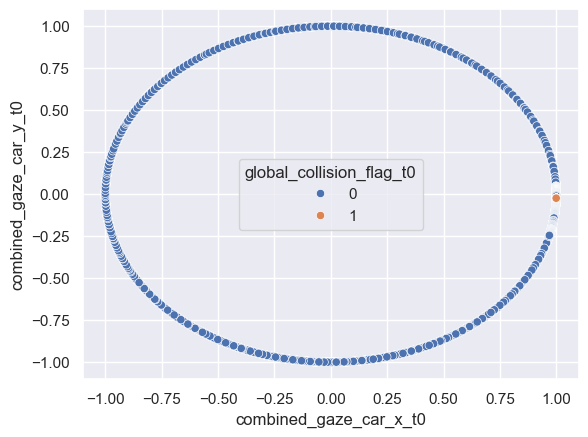

In [23]:
sns.scatterplot(data=analysis_df,x='combined_gaze_car_x_t0',y='combined_gaze_car_y_t0',hue='global_collision_flag_t0')

<Axes: xlabel='Gas pedal_t0', ylabel='Brake pedal force_t0'>

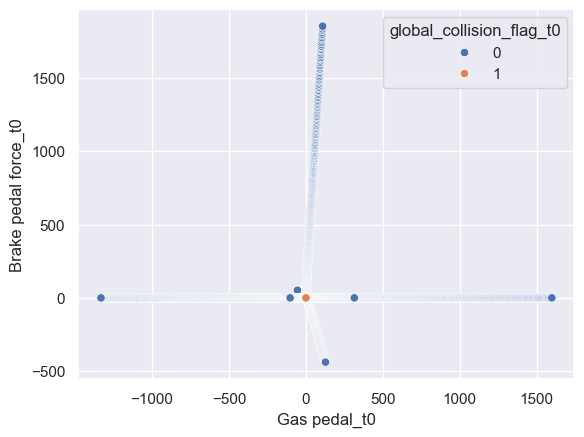

In [24]:
sns.scatterplot(data=analysis_df,x='Gas pedal_t0',y='Brake pedal force_t0',hue='global_collision_flag_t0')

<Axes: xlabel='Data Gaze2D X_t0', ylabel='Data Gaze2D Y_t0'>

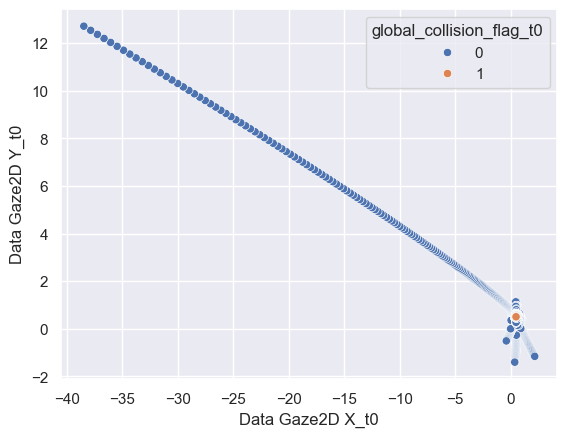

In [25]:
sns.scatterplot(data=analysis_df,x='Data Gaze2D X_t0',y='Data Gaze2D Y_t0',hue='global_collision_flag_t0')

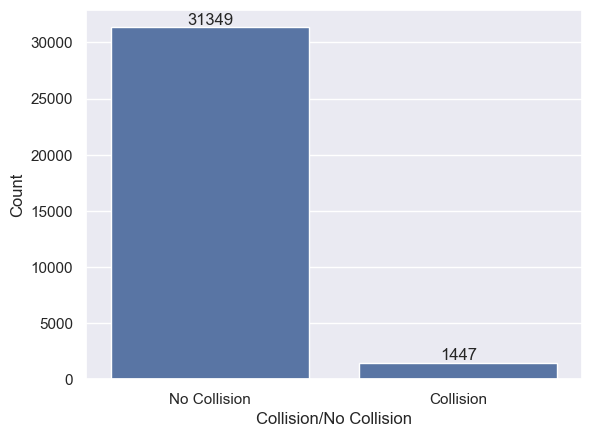

In [26]:
# Plot the class balance for the analysis set
ax = sns.countplot(x=analysis_df['Is_Gaze_On_Hazard_t0'])
ax.bar_label(ax.containers[0])
plt.xlabel('Collision/No Collision')
plt.ylabel('Count')

plt.xticks([0,1],['No Collision','Collision'])
plt.show()

## Machine Learning Setup

In [27]:
window_size = 20

In [28]:
train_df = pd.read_csv(f'data/processed_data/final_data_{window_size}/training.csv')
test_df = pd.read_csv(f'data/processed_data/final_data_{window_size}/testing.csv')
validate_df = pd.read_csv(f'data/processed_data/final_data_{window_size}/validation.csv')

C:\Users\01eco\AppData\Local\Temp\ipykernel_42988\1246784373.py:1: DtypeWarning: Columns (61,140,219,298,377,456,535,614,693,772,851,930,1009,1088,1167,1246,1325,1404,1483,1562) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(f'data/processed_data/final_data_{window_size}/training.csv')


In [29]:
print(train_df.shape)
print(test_df.shape)
print(validate_df.shape)

(226282, 1580)
(32496, 1580)
(60984, 1580)


### Perform Cleaning Stage
Remove features based on information gathered from the statistical analysis and correlation

In [30]:
columns = train_df.columns.to_list()
remove_cols = ['Pitch acceleration.hazard_','Roll acceleration.hazard_','Yaw acceleration.hazard_']
for rc in remove_cols:
    for c in columns:
        if rc in c:
            train_df.drop(columns=[c],inplace=True)
            test_df.drop(columns=[c],inplace=True)
            validate_df.drop(columns=[c],inplace=True)

print(train_df.shape)

(226282, 1520)


In [31]:
# Set all boolean values to 0 or 1
train_df.replace({False: 0, True: 1,'False': 0, 'True': 1,'0.0': 0,'1.0': 1},inplace=True)
test_df.replace({False: 0, True: 1,'False': 0, 'True': 1,'0.0': 0,'1.0': 1},inplace=True)
validate_df.replace({False: 0, True: 1,'False': 0, 'True': 1,'0.0': 0,'1.0': 1},inplace=True)

C:\Users\01eco\AppData\Local\Temp\ipykernel_42988\2793344722.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df.replace({False: 0, True: 1,'False': 0, 'True': 1,'0.0': 0,'1.0': 1},inplace=True)
C:\Users\01eco\AppData\Local\Temp\ipykernel_42988\2793344722.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df.replace({False: 0, True: 1,'False': 0, 'True': 1,'0.0': 0,'1.0': 1},inplace=True)
C:\Users\01eco\AppData\Local\Temp\ipykernel_42988\2793344722.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated

In [32]:
# Drop any missing rows (eye tracking data is missing from these rows directly from the first stage)
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
validate_df.dropna(inplace=True)

In [33]:
if window_size == 1:
    plt.subplots(figsize=(100,100))
    sns.heatmap(train_df.corr(numeric_only=True),cmap='coolwarm',annot=True)

    plt.tick_params(axis='both',which='both',bottom=True,top=True,left=True,right=True,labelbottom=True,labeltop=True,labelleft=True,labelright=True)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)

    os.makedirs('results/statistical_analysis', exist_ok=True)
    plt.savefig('results/statistical_analysis/correlation_map_training.png')
    plt.show()

In [34]:
# pull the labels from the dataframes into separate arrays
train_df_y_reg = train_df[[c for c in train_df.columns.to_list() if 'time_to_collision_flag' in c][-1]]
train_df_y_class = train_df[[c for c in train_df.columns.to_list() if 'global_collision_flag' in c][-1]]

test_df_y_reg = test_df[[c for c in test_df.columns.to_list() if 'time_to_collision_flag' in c][-1]]
test_df_y_class = test_df[[c for c in test_df.columns.to_list() if 'global_collision_flag' in c][-1]]

validate_df_y_reg = validate_df[[c for c in validate_df.columns.to_list() if 'time_to_collision_flag' in c][-1]]
validate_df_y_class = validate_df[[c for c in validate_df.columns.to_list() if 'global_collision_flag' in c][-1]]

# Remove all label features after separating them
columns = train_df.columns.to_list()
remove_cols = ['time_to_collision_flag','global_collision_flag']
for rc in remove_cols:
    for c in columns:
        if rc in c:
            train_df.drop(columns=[c],inplace=True)
            test_df.drop(columns=[c],inplace=True)
            validate_df.drop(columns=[c],inplace=True)

C:\Users\01eco\AppData\Local\Temp\ipykernel_42988\4220011946.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['No Collision', 'Collision'])
C:\Users\01eco\AppData\Local\Temp\ipykernel_42988\4220011946.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['No Collision', 'Collision'])
C:\Users\01eco\AppData\Local\Temp\ipykernel_42988\4220011946.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(['No Collision', 'Collision'])


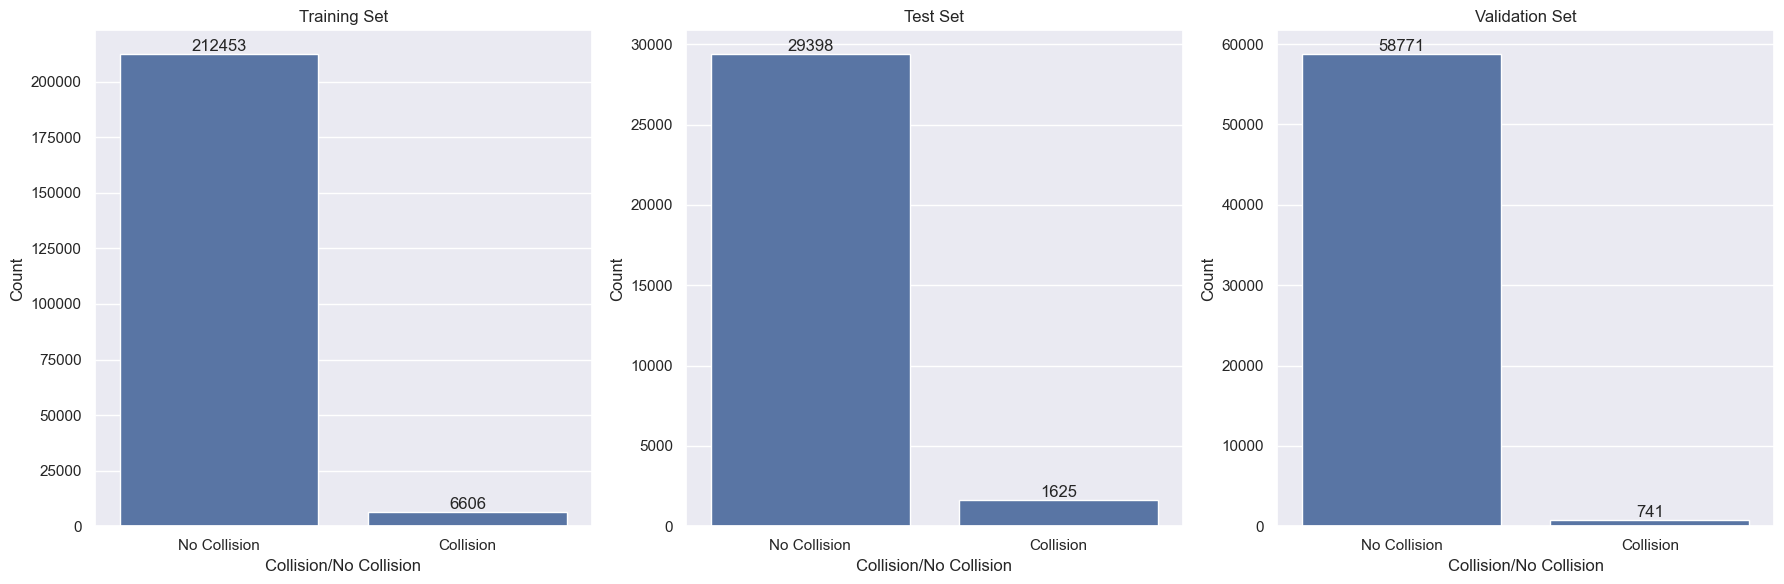

In [35]:
# Plot the class balance for the training, test, and validation sets
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Training set
sns.countplot(x=train_df_y_class, ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Training Set')
ax[0].set_xlabel('Collision/No Collision')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(['No Collision', 'Collision'])

# Test set
sns.countplot(x=test_df_y_class, ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_title('Test Set')
ax[1].set_xlabel('Collision/No Collision')
ax[1].set_ylabel('Count')
ax[1].set_xticklabels(['No Collision', 'Collision'])

# Validation set
sns.countplot(x=validate_df_y_class, ax=ax[2])
ax[2].bar_label(ax[2].containers[0])
ax[2].set_title('Validation Set')
ax[2].set_xlabel('Collision/No Collision')
ax[2].set_ylabel('Count')
ax[2].set_xticklabels(['No Collision', 'Collision'])

plt.tight_layout()
plt.show()

In [36]:
# Postive case -> no collision
# Negative case -> collision

def eval_learner (record_title,y_true,y_predict):
    print(f'Records for {record_title}')
    cm = confusion_matrix(y_true,y_predict)
    # tp fp
    # fn tn
    tn, fp, fn, tp = cm.ravel()
    
    records = tp+fn+tn+fp

    precision = precision_score(y_true,y_predict)
    recall = recall_score(y_true,y_predict)
    f1 = f1_score(y_true,y_predict)
    accuracy = accuracy_score(y_true,y_predict)
    specificty = tn/(tn+fp)
    rocauc = roc_auc_score(y_true,y_predict)

    sns.heatmap(cm, annot=True,fmt='g',cbar=False,cmap='RdYlGn', xticklabels=['Predicted No Collision','Predicted Collision'],yticklabels=['Actually No Collision','Actually Collision'])
    plt.ylabel('Actual', fontsize=13)
    plt.gca().xaxis.set_label_position('top') 
    plt.xlabel('Prediction', fontsize=13)
    plt.gca().xaxis.tick_top()

    plt.gca().figure.subplots_adjust(bottom=0.2)
    plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
    plt.show()

    print(f'Evaluating predictions of {records} records:')
    print(f'Precision = {precision}\nRecall = {recall}\nF1 = {f1}\nAccuracy = {accuracy}\nSpecificity = {specificty}\nROC/AUC Score = {rocauc}')

## Create initial SVM without balancing, scaling or feature selection

In [37]:
class_model = svm.SVC()
class_model = class_model.fit(train_df,train_df_y_class)

In [38]:
class_model_prediction = class_model.predict(test_df)

Records for SVM, Unbalanced/Scaled, Full dataset


c:\Users\01eco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


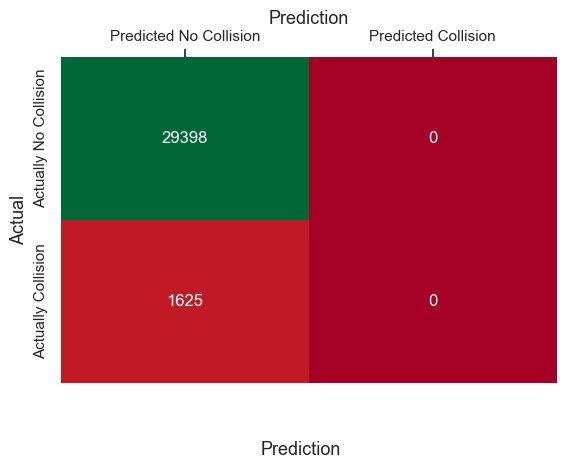

Evaluating predictions of 31023 records:
Precision = 0.0
Recall = 0.0
F1 = 0.0
Accuracy = 0.9476195081068884
Specificity = 1.0
ROC/AUC Score = 0.5


In [39]:
eval_learner('SVM, Unbalanced/Scaled, Full dataset',test_df_y_class,class_model_prediction)

## Perform feature selection using scikit-learn

In [40]:
n_features = window_size
selected_features = train_df.columns[SelectKBest(f_classif, k=n_features).fit(train_df, train_df_y_class).get_support()]
print(selected_features)

Index(['Is_Gaze_On_Hazard_t0', 'Is_Gaze_On_Hazard_t1', 'Is_Gaze_On_Hazard_t2',
       'Is_Gaze_On_Hazard_t3', 'Is_Gaze_On_Hazard_t4', 'Is_Gaze_On_Hazard_t5',
       'Is_Gaze_On_Hazard_t6', 'Is_Gaze_On_Hazard_t7', 'Is_Gaze_On_Hazard_t8',
       'Is_Gaze_On_Hazard_t9', 'Is_Gaze_On_Hazard_t10',
       'Is_Gaze_On_Hazard_t11', 'Is_Gaze_On_Hazard_t12',
       'Is_Gaze_On_Hazard_t13', 'Is_Gaze_On_Hazard_t14',
       'Is_Gaze_On_Hazard_t15', 'Is_Gaze_On_Hazard_t16',
       'Is_Gaze_On_Hazard_t17', 'Is_Gaze_On_Hazard_t18',
       'Is_Gaze_On_Hazard_t19'],
      dtype='object')


Selected label that indicates if the gaze of the driver is on the hazard vehicle. Train new model on reduced input set:

In [41]:
reduced_class = svm.SVC()
reduced_class.fit(train_df[selected_features],train_df_y_class)

SVC()

In [42]:
reduced_class_predict = reduced_class.predict(test_df[selected_features])

Records for SVM, Unbalanced, Reduced dataset


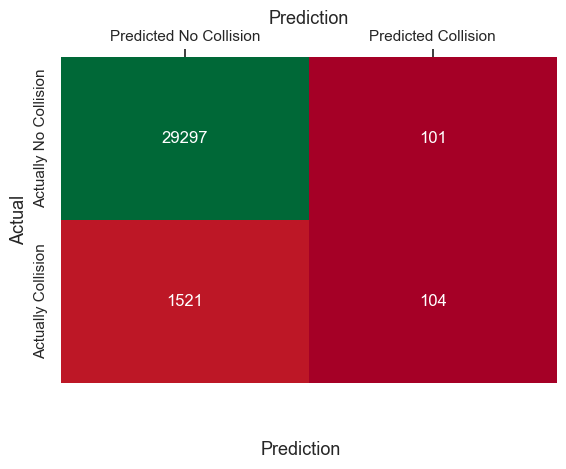

Evaluating predictions of 31023 records:
Precision = 0.5073170731707317
Recall = 0.064
F1 = 0.11366120218579236
Accuracy = 0.9477162105534603
Specificity = 0.9965643921355194
ROC/AUC Score = 0.5302821960677597


In [43]:
eval_learner('SVM, Unbalanced, Reduced dataset',test_df_y_class,reduced_class_predict)

## Apply SMOTE to balance the classes

In [44]:
smote = SMOTE(sampling_strategy=1.0,random_state=random_state)
train_df_res,train_df_y_class_res = smote.fit_resample(train_df,train_df_y_class)

c:\Users\01eco\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\01eco\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\01eco\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\01eco\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

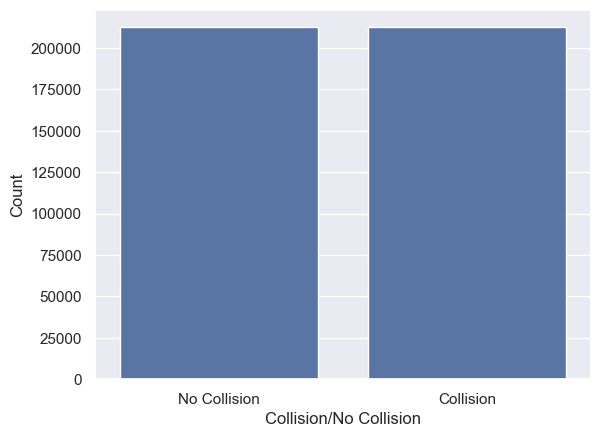

In [45]:
# Plot the class balance for the training set
sns.countplot(x=train_df_y_class_res)
plt.xlabel('Collision/No Collision')
plt.ylabel('Count')

plt.xticks([0,1],['No Collision','Collision'])
plt.show()

## Train SVM using the class-balanced dataset

In [46]:
# ~11 minutes
balanced_svm = svm.SVC(C=10,kernel='rbf',gamma=0.1)
balanced_svm.fit(train_df_res[selected_features],train_df_y_class_res)

SVC(C=10, gamma=0.1)

In [47]:
balanced_svm_prediction = balanced_svm.predict(test_df[selected_features])

Records for SVM, Balanced, reduced dataset


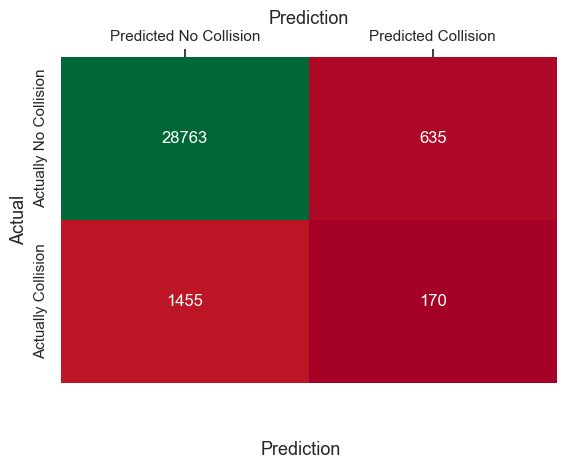

Evaluating predictions of 31023 records:
Precision = 0.2111801242236025
Recall = 0.10461538461538461
F1 = 0.13991769547325103
Accuracy = 0.9326306288882442
Specificity = 0.9783998911490578
ROC/AUC Score = 0.5415076378822211


In [48]:
eval_learner('SVM, Balanced, reduced dataset',test_df_y_class,balanced_svm_prediction)

### Use the balanced SVM on the validation set

In [49]:
# ~11 minutes
balanced_validated = balanced_svm.predict(validate_df[selected_features])

Records for SVM, balanced, reduced dataset, validation


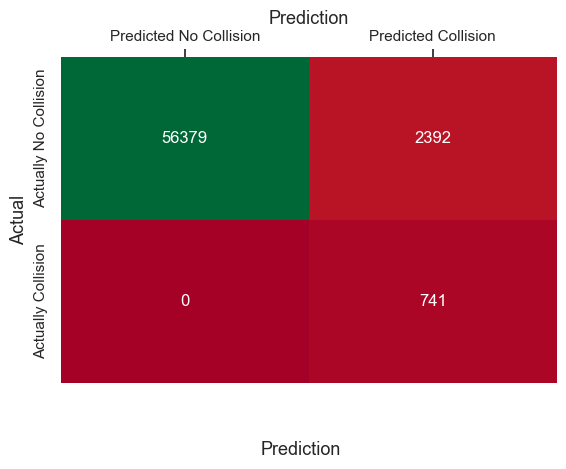

Evaluating predictions of 59512 records:
Precision = 0.23651452282157676
Recall = 1.0
F1 = 0.3825503355704698
Accuracy = 0.959806425594838
Specificity = 0.9592996545915502
ROC/AUC Score = 0.9796498272957751


In [50]:
eval_learner('SVM, balanced, reduced dataset, validation',validate_df_y_class,balanced_validated)

### Random Forest Classifier

In [51]:
rf_classifier = RandomForestClassifier(max_depth=3,n_estimators=100,random_state=random_state)
rf_classifier.fit(train_df_res[selected_features],train_df_y_class_res)

RandomForestClassifier(max_depth=3, random_state=42)

In [52]:
rf_classifier_prediction = rf_classifier.predict(test_df[selected_features])

Records for RF, balanced, reduced dataset


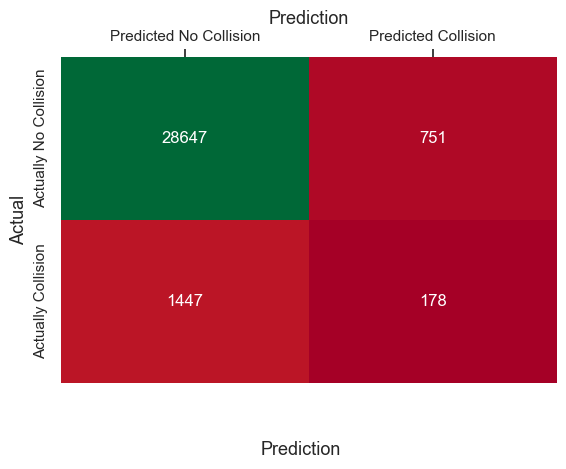

Evaluating predictions of 31023 records:
Precision = 0.1916038751345533
Recall = 0.10953846153846154
F1 = 0.139389193422083
Accuracy = 0.9291493408116559
Specificity = 0.9744540444928227
ROC/AUC Score = 0.5419962530156421


In [53]:
eval_learner('RF, balanced, reduced dataset',test_df_y_class,rf_classifier_prediction)

In [67]:
perform_grid_search = False

if perform_grid_search:
    param_grid = {
        'max_depth' : [15,16,17,18,19,20],
        'n_estimators' : [5000],
        'random_state' : [42],
        'criterion' : ['gini']
    }

    rf_search = GridSearchCV(
        RandomForestClassifier(),
        param_grid,
        n_jobs=-1,
        verbose=3
    )

    rf_search.fit(train_df_res[selected_features],train_df_y_class_res)

    best_params = rf_search.best_params_
    print(best_params)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 5000, 'random_state': 42}


In [68]:
if perform_grid_search:
    rf_search_prediction = rf_search.predict(test_df[selected_features])

Records for RF, balanced, reduced dataset, optimized params


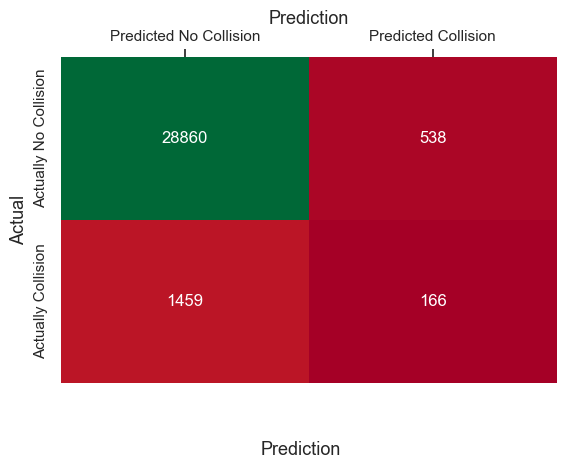

Evaluating predictions of 31023 records:
Precision = 0.23579545454545456
Recall = 0.10215384615384615
F1 = 0.14255045083726922
Accuracy = 0.9356284047319731
Specificity = 0.9816994353357371
ROC/AUC Score = 0.5419266407447916


In [69]:
if perform_grid_search:
    eval_learner('RF, balanced, reduced dataset, optimized params',test_df_y_class,rf_search_prediction)

### MLP Classifier

In [54]:
mlp_classifier = MLPClassifier(random_state=random_state,max_iter=5000)
mlp_classifier.fit(train_df_res[selected_features],train_df_y_class_res)

MLPClassifier(max_iter=5000, random_state=42)

In [55]:
mlp_classifier_predict = mlp_classifier.predict(test_df[selected_features])

Records for MLP, balanced, reduced dataset


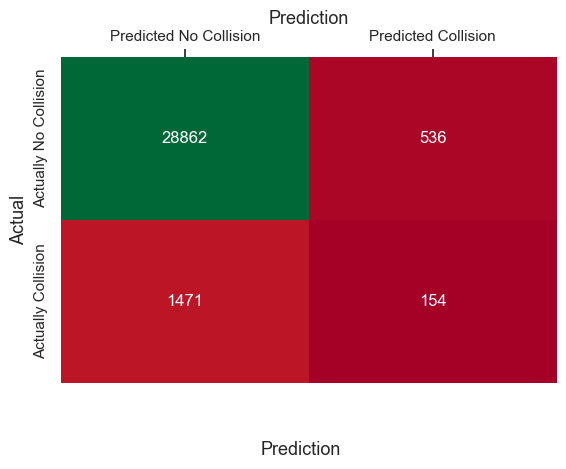

Evaluating predictions of 31023 records:
Precision = 0.22318840579710145
Recall = 0.09476923076923077
F1 = 0.1330453563714903
Accuracy = 0.9353060632434
Specificity = 0.9817674671746377
ROC/AUC Score = 0.5382683489719342


In [56]:
eval_learner('MLP, balanced, reduced dataset',test_df_y_class,mlp_classifier_predict)

In [57]:
# Leave in place
print(f'Finished pipeline for window_size={window_size} at {datetime.now()}')

Finished pipeline for window_size=20 at 2025-02-01 14:18:53.043485


In [ ]:
if perform_grid_search:
	parameters = [
			{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
			{'C': [1, 10, 100, 1000], 'kernel': ['rbf'],
					'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

	# perform the search
	print(" . Performing grid search")
	svc_search = GridSearchCV(
				svm.SVC(),      # estimator object
				parameters, # parameters to search among
				n_jobs=-1,  # -1 means "use all available CPUs"
				verbose=1)  # give a message indicating setup
	svc_search.fit(train_df_res[selected_features],train_df_y_class_res)


	best_parameters = svc_search.best_params_
	print(" . Best parameters found for SVN:", best_parameters)

In [59]:
if perform_grid_search:
    svc_search_prediction = svc_search.predict(test_df[selected_features])

In [60]:
if perform_grid_search:
    eval_learner('SVM, balanced, reduced dataset, optimized params',test_df_y_class,svc_search_prediction)

In [70]:
features_to_select = ['Data Gaze2D X','Data Gaze2D Y','Velocity','Avg_Pupildiameter']
updated_feature_selection = []
for f in features_to_select:
    for c in train_df_res.columns:
        if f in c:
            updated_feature_selection.append(c)

['Data Gaze2D X_t0', 'Data Gaze2D X_t1', 'Data Gaze2D X_t2', 'Data Gaze2D X_t3', 'Data Gaze2D X_t4', 'Data Gaze2D X_t5', 'Data Gaze2D X_t6', 'Data Gaze2D X_t7', 'Data Gaze2D X_t8', 'Data Gaze2D X_t9', 'Data Gaze2D X_t10', 'Data Gaze2D X_t11', 'Data Gaze2D X_t12', 'Data Gaze2D X_t13', 'Data Gaze2D X_t14', 'Data Gaze2D X_t15', 'Data Gaze2D X_t16', 'Data Gaze2D X_t17', 'Data Gaze2D X_t18', 'Data Gaze2D X_t19', 'Data Gaze2D Y_t0', 'Data Gaze2D Y_t1', 'Data Gaze2D Y_t2', 'Data Gaze2D Y_t3', 'Data Gaze2D Y_t4', 'Data Gaze2D Y_t5', 'Data Gaze2D Y_t6', 'Data Gaze2D Y_t7', 'Data Gaze2D Y_t8', 'Data Gaze2D Y_t9', 'Data Gaze2D Y_t10', 'Data Gaze2D Y_t11', 'Data Gaze2D Y_t12', 'Data Gaze2D Y_t13', 'Data Gaze2D Y_t14', 'Data Gaze2D Y_t15', 'Data Gaze2D Y_t16', 'Data Gaze2D Y_t17', 'Data Gaze2D Y_t18', 'Data Gaze2D Y_t19', 'Velocity_t0', 'Velocity_t1', 'Velocity_t2', 'Velocity_t3', 'Velocity_t4', 'Velocity_t5', 'Velocity_t6', 'Velocity_t7', 'Velocity_t8', 'Velocity_t9', 'Velocity_t10', 'Velocity_t11

In [74]:
updated_svm = svm.SVC(C=1,kernel='rbf',gamma=0.1)
updated_svm.fit(train_df_res[updated_feature_selection],train_df_y_class_res)

SVC(C=1, gamma=0.1)

In [75]:
updated_svm_prediction = updated_svm.predict(test_df[updated_feature_selection])

Records for SVM Updated feature set


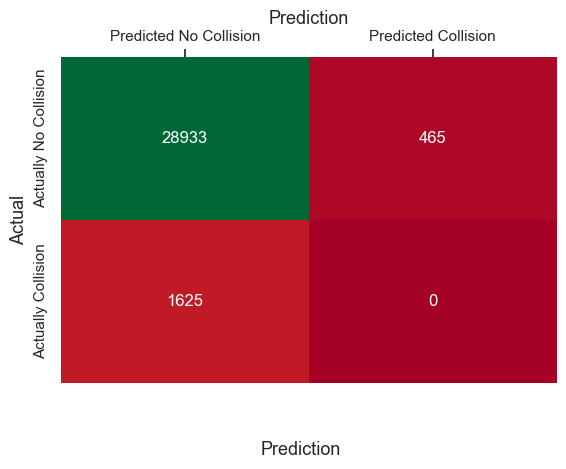

Evaluating predictions of 31023 records:
Precision = 0.0
Recall = 0.0
F1 = 0.0
Accuracy = 0.9326306288882442
Specificity = 0.9841825974556092
ROC/AUC Score = 0.4920912987278046


In [76]:
eval_learner('SVM Updated feature set',test_df_y_class,updated_svm_prediction)

In [77]:


undersampler = RandomUnderSampler(random_state=random_state)
train_df_under_res, train_df_y_class_under_res = undersampler.fit_resample(train_df,train_df_y_class)

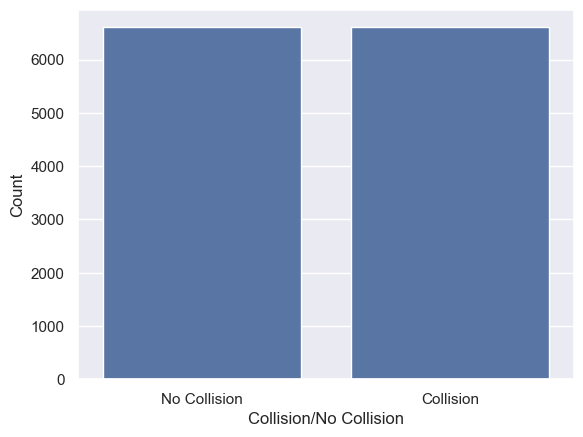

In [81]:
# Plot the class balance for the training set
sns.countplot(x=train_df_y_class_under_res)
plt.xlabel('Collision/No Collision')
plt.ylabel('Count')

plt.xticks([0,1],['No Collision','Collision'])
plt.show()

In [83]:
under_res_svm = svm.SVC()
under_res_svm.fit(train_df_under_res[selected_features],train_df_y_class_under_res)

SVC()

In [84]:
under_res_svm_prediction = under_res_svm.predict(test_df[selected_features])

Records for SVM Updated feature set


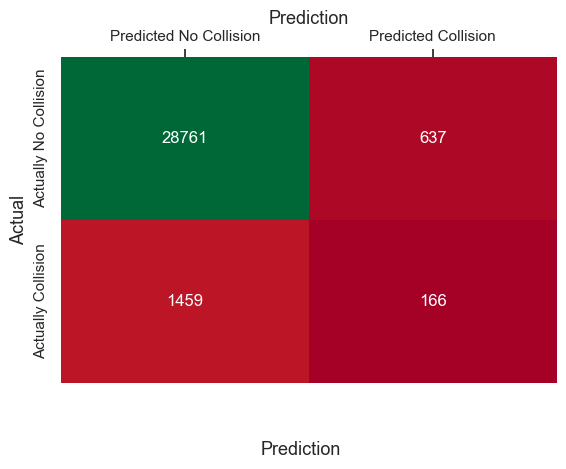

Evaluating predictions of 31023 records:
Precision = 0.20672478206724781
Recall = 0.10215384615384615
F1 = 0.13673805601317957
Accuracy = 0.9324372239951004
Specificity = 0.9783318593101572
ROC/AUC Score = 0.5402428527320017


In [85]:
eval_learner('SVM Updated feature set',test_df_y_class,under_res_svm_prediction)